# **Section 1: Let's create an artificial neuron** 😍

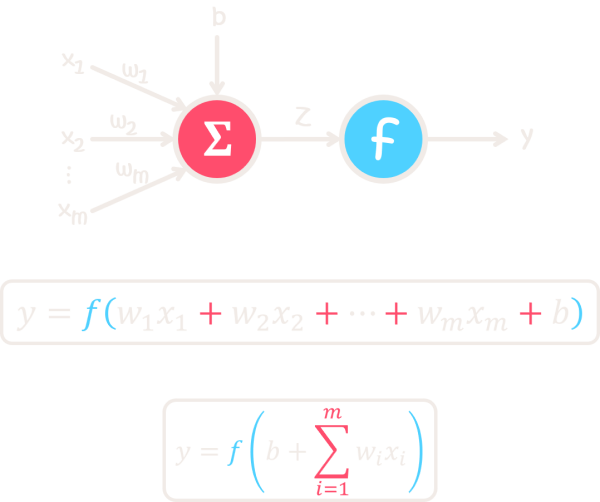

### Imports

In [1]:
import torch

## **Section 1.1: Simple neuron**

### Input, weight and bias

In [2]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

w = torch.tensor([1., 0.5, 1., -1., -0.5])

b = torch.tensor(1.)

### Linear activation function

In [7]:
def linear(x):
    return x

### Step activation function

In [12]:
def step(x):
    if x > 0:
        return torch.tensor(1.0)
    elif x < 0:
        return torch.tensor(0.0)
    else:
        return torch.tensor(0.5)

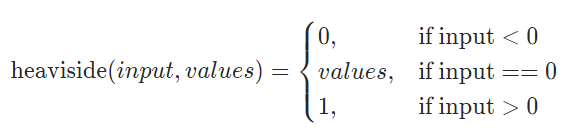

In [15]:
torch.heaviside(input=torch.tensor(-1.0), values=torch.tensor(0.5))

tensor(0.)

### Neuron function

In [8]:
def neuron(x, w, b, af):
    z = 0
    for x_i, w_i in zip(x, w):
        z += x_i * w_i
    z += b
    y = af(z)
    return y

### Test 

In [9]:
neuron(x[0], w, b, linear)

tensor(-1.5000)

In [13]:
neuron(x[0], w, b, step)

tensor(0.)

## **Section 1.2: Vectorization** 🕶

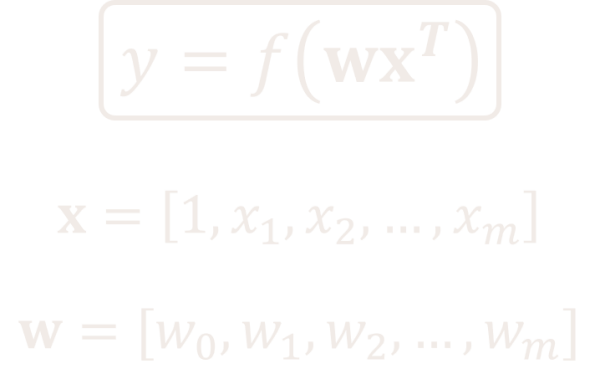

In [16]:
def neuron(x, w, b, af):
  y = af(x @ w + b)
  return y

In [17]:
neuron(x[0], w, b, linear)

tensor(-1.5000)

In [18]:
neuron(x[0], w, b, step)

tensor(0.)

## **Section 1.3: Class Neuron 🔥**

In [29]:
class Neuron:
    def __init__(self, m, af):
        self.w = torch.randn(m)
        self.b = torch.randn(1)
        self.af = af

    def __call__(self, x):
        y = self.af(self.w @ x + self.b)
        return y

In [30]:
neuron_2 = Neuron(5, linear)

In [31]:
neuron_2(x[0])  # call

tensor([-5.1638])

# **Section 2: Loss functions 🍉** 

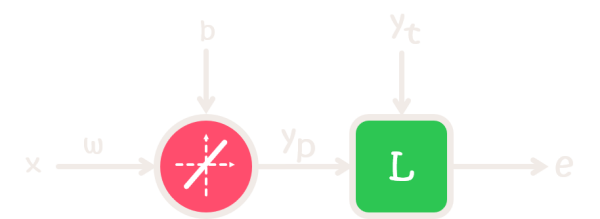

## Imports

In [ ]:
import torch

## Prediction and target

In [ ]:
yp = torch.tensor([-0.39, -0.47,  0.61, -0.75,  0.31, -0.54,  0.61, -2.83, 1.24,  0.10])

yt = torch.tensor([-0.39,  1.00,  0.51, -0.85,  0.31, -0.04,  1.01, -0.55, 1.24,  0.10])

## Mean Squared Error (MSE)
\begin{align}
MSE &= \frac{1}{n} \sum_{i=1}^n (y_{p_i}-y_{t_i})^2
\end{align}

### From scratch

### MSE class in pytorch

### MSE function in pytorch

## Mean Absolute Error (MAE)
\begin{align}
MAE &= \frac{1}{n} \sum_{i=1}^n |y_{p_i}-y_{t_i}|
\end{align}

### From scratch

In [ ]:
mae = ...

### MAE class in pytorch

In [ ]:
mae = nn.L1Loss()
mae(yp, yt)

tensor(0.4850)

### MAE function in pytorch

In [ ]:
F.l1_loss(yp, yt)

tensor(0.4850)

## Connect neuron to loss funtion! ⚡


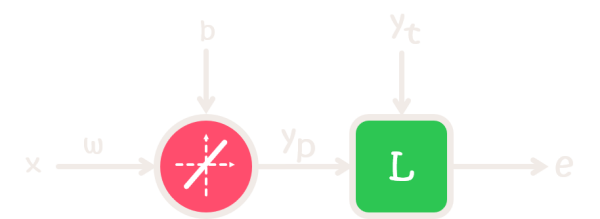

### From Section 1

In [ ]:
class Neuron:
  def __init__(self, m, af):
      self.w = torch.randn(m)
      self.b = torch.randn(1)
      self.af = af

  def __call__(self, x): 
      y = self.linear(self.w @ x + self.b)
      return y



In [ ]:
neuron = Neuron(5, 'linear')

### Input & target

In [ ]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

yt = torch.tensor([1., 2., 0.])

### Now give output of the neuron to the loss funtion

In [ ]:
yp = neuron(x)

e = F.mse_loss(yp, yt)
print(e)

In [ ]:
yp = neuron(x)

e = ...
print(e)

# **Section 3: Gradient descent** 🔄

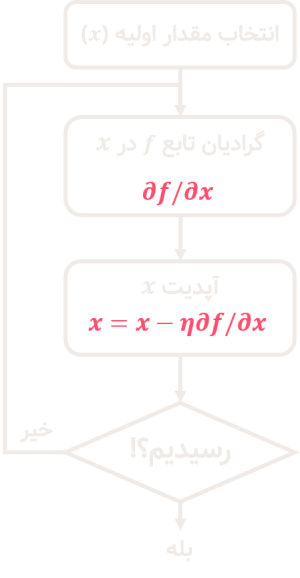

## Imports

In [ ]:
import torch

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
def plot(x, func):
  plt.figure(figsize=(8, 6))
  plt.plot(x, func(x), linewidth=3)
  plt.xlabel('x', fontsize=15)
  plt.ylabel('f(x)', fontsize=15)
  plt.show()

In [ ]:
def animate(x, func, gradfunc, xi, eta, N):
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  xi_hist.append(xi.clone())
  for iter in range(N):
    xi = gradient_descent(gradfunc, xi, eta, 1)
    xi_hist.append(xi.clone())
  xi_hist = torch.tensor(xi_hist)
  fxi_hist = func(xi_hist)
  # plot animation
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(1, 1, 1)
  def plot_animate(i):
    ax.clear()
    ax.plot(x, func(x), linewidth=3)
    ax.plot(xi_hist[0:i], fxi_hist[0:i], color='black', linewidth=4)
    ax.plot(xi_hist[0], fxi_hist[0], 'r*', markersize=15)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
  ani = animation.FuncAnimation(fig, plot_animate, 
                                frames=len(xi_hist), 
                                interval=120, 
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

## Find the minimum of $ f(x) = x^{2} $

### Implement $ f $

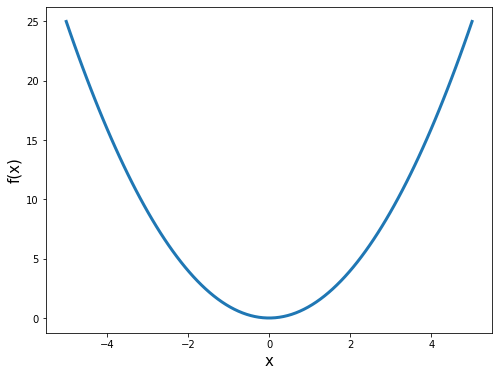

### Implement gradient function

### Implement gradient descent

In [ ]:
def gradient_descent(gradfunc, xi, eta, N):
  pass

tensor(-5.7090e-05)

### Animation

In [ ]:
xi = torch.tensor(-4.)
eta = 1.1
N = 20


## Find the minimum
$ f(x) = 0.125x^4-0.1875x^3-0.75x^2+0.5x $

$ f^{'}(x) = 0.5x^3-0.5625x^2-1.5x+0.5$

$ x \in [-2.5, 3.3] $

### Implement $ f $ and its gradient

In [ ]:
def funcx4(x):
  return 0.125*x**4 - 0.1875*x**3 - 0.75*x**2 + 0.5*x

In [ ]:
def gradfx4(x):
  return 0.5*x**3 - 0.5625*x**2 - 1.5*x + 0.5

### Animation

In [ ]:
x = torch.linspace(-2.5, 3.3, 100)
xi = torch.tensor(1.)
eta = 0.3
N = 30

animate(x, funcx4, gradfx4, xi, eta, N)

## Find the minimum
$ f(x) = log( 1 + |x| ) ^ {2 + sin(x)} $

$ x \in [-10.5, 10.5] $

### Implement $ f $

In [ ]:
def funclog(x):
  return 

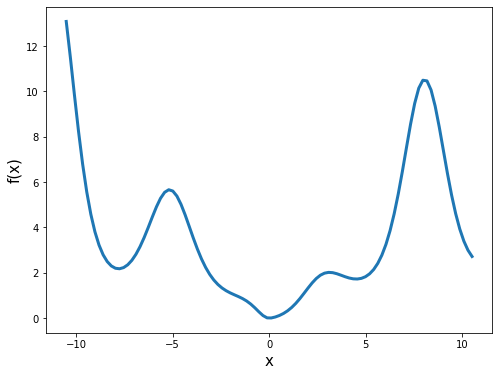

In [ ]:
x = torch.linspace(-10.5, 10.5, 100)
plot(x, funclog)

### Implement gradient function 😨

In [ ]:
# ???!!! 

### Animatation

# **Section 4: Autograd 🚗**

## Imports

In [ ]:
import torch

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
def plot(x, func):
  plt.figure(figsize=(8, 6))
  plt.plot(x, func(x), linewidth=3)
  plt.xlabel('x', fontsize=15)
  plt.ylabel('f(x)', fontsize=15)
  plt.show()

In [ ]:
def animate(x, func, gradfunc, xi, eta, N):
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  xi_hist.append(xi.clone())
  for iter in range(N):
    xi = gradient_descent(gradfunc, xi, eta, 1)
    xi_hist.append(xi.clone())
  xi_hist = torch.tensor(xi_hist)
  fxi_hist = func(xi_hist)
  # plot animation
  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(1, 1, 1)
  def plot_animate(i):
    ax.clear()
    ax.plot(x, func(x), linewidth=3)
    ax.plot(xi_hist[0:i], fxi_hist[0:i], color='black', linewidth=4)
    ax.plot(xi_hist[0], fxi_hist[0], 'r*', markersize=15)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
  ani = animation.FuncAnimation(fig, plot_animate, 
                                frames=len(xi_hist), 
                                interval=120, 
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

## Derivative of $ f(x) = x^{2} $ with autograd pytorch `backward`

## Find the minimum of $ f(x) = x^{2} $ with pytorch autograd `backward`

### Implement $ f $

In [ ]:
def funcx2(x):
  return x**2

### Implement gradient descent

In [ ]:
def gradient_descent(gradfunc, xi, eta, N):
  for iter in range(N):   
    xi -= eta * gradfunc(xi)
  return xi

### Animation

In [ ]:
xi = torch.tensor(-4., requires_grad=True)
eta = 0.1
N = 50
x = torch.linspace(-4., 4, 100)



## Find the minimum
$ f(x) = log( 1 + |x| ) ^ {2 + sin(x)} $

$ x \in [-10.5, 10.5] $

### Implement $ f $

In [ ]:
def funclog(x):
  return torch.log(1 + torch.abs(x))**(2 + torch.sin(x))

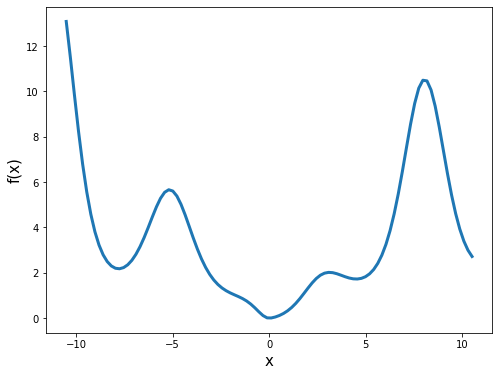

In [ ]:
x = torch.linspace(-10.5, 10.5, 100)
plot(x, funclog)

### Animatation 😎

In [ ]:
xi = torch.tensor(-4., requires_grad=True)
eta = 0.3
N = 50

animate(x, funclog, None, xi, eta, N)

## Find the minimum
$ f(x) = (x^2 - 1)^3 $

$ x \in [-1.5, 1.5] $

### Implement $ f $

In [ ]:
def funcx3(x):
  return ...

### Visualize $ f $

In [ ]:
x = torch.linspace(-1.5, 1.5, 100)

plot(x, funcx3)

### Animatation 

In [ ]:
xi = ...
eta = ...
N = ...

animate(x, ..., ..., ..., eta, N)

## 3D

In [ ]:
!pip install matplotlib==2.2.3

### Imports

In [ ]:
import torch

### Visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def plot3d(x, y, func):
  x, y = torch.meshgrid(x, y)
  z = func(x, y)
  fig = plt.figure(figsize=(15, 10))
  ax = plt.axes(projection='3d')
  ax.plot_surface(x.numpy(), y.numpy(), z.numpy(), cmap='viridis')
  plt.show()

In [ ]:
def animate3d(x, y, func, gradfunc, xi, yi, eta, N):
  x, y = torch.meshgrid(x, y)
  if gradfunc is None:
    gradfunc = func
  xi_hist = []
  yi_hist = []
  xi_hist.append(xi.clone())
  yi_hist.append(yi.clone())
  for iter in range(N):
    xi, yi = gradient_descent3d(gradfunc, xi, yi, eta, 1)
    xi_hist.append(xi.clone())
    yi_hist.append(yi.clone())
  xi_hist = torch.tensor(xi_hist, requires_grad=False)
  yi_hist = torch.tensor(yi_hist, requires_grad=False)
  fi_hist = func(xi_hist, yi_hist)
  # plot animation
  fig = plt.figure(figsize=(15, 10))
  ax = plt.axes(projection='3d')
  def plot_animate(i):
    ax.clear()
    ax.plot_surface(x.numpy(), y.numpy(), func(x, y).numpy(), cmap='viridis')
    ax.plot(xi_hist[0:i].tolist(), yi_hist[0:i].tolist(), fi_hist[0:i].tolist(), 
            color='black', linewidth=4)
    ax.plot([xi_hist[0]], [yi_hist[0]], [fi_hist[0]],
            'r*', markersize=15)
  ani = animation.FuncAnimation(fig, plot_animate, 
                                frames=len(xi_hist), 
                                interval=60, 
                                repeat=False)
  plt.close()
  return HTML(ani.to_html5_video())

### Find the minimum
$ f(x,y) = xe^{-x^2-y^2}+0.05(x^2+y^2) $

$ x,y \in [-2, 2] $

Implement $ f $

In [ ]:
def func3d(x, y):
  return x * torch.exp(-x**2 - y**2) + 0.05 * (x**2 + y**2)

Visualize $ f $

/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


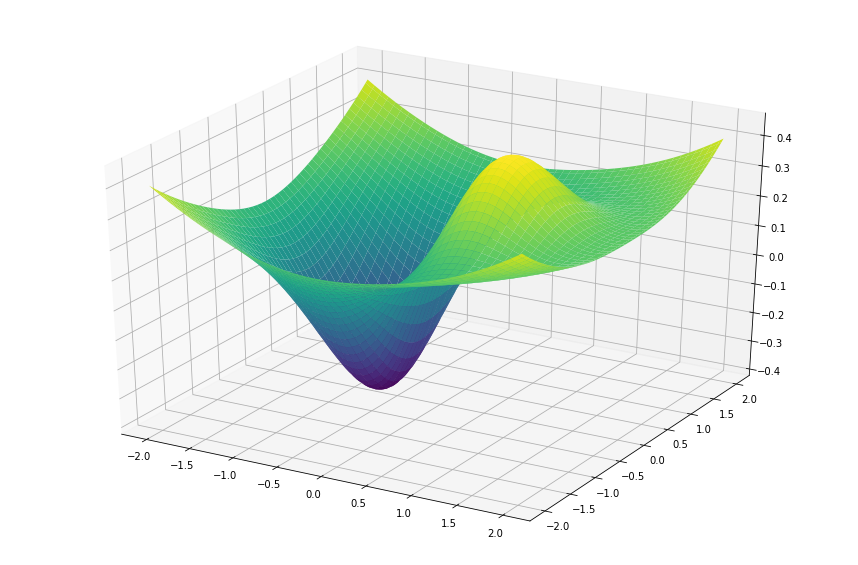

In [ ]:
x = torch.linspace(-2, 2, 100)
y = torch.linspace(-2, 2, 100)

plot3d(x, y, func3d)

Gradient descent

In [ ]:
def gradient_descent3d(func, xi, yi, eta, N):
  for iter in range(N):
    func(xi, yi).backward()
    ...
  return xi, yi

Animate

In [ ]:
xi = torch.tensor(-2., requires_grad=True)
yi = torch.tensor(2., requires_grad=True)
eta = 0.1
N = 100

animate3d(x, y, func3d, None, xi, yi, eta, N)

### Find the minimum
$ f(x,y) = x^2-y^2 $

$ x,y \in [-2, 2] $

Implement $ f $

In [ ]:
def func3d(x, y):
  return ...

Visualize $ f $

Animate

In [ ]:
animate3d(...)

## Now connect grad function to the train block diagram! ⚡

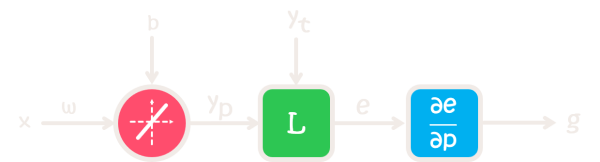

### Imports

In [ ]:
import torch
import torch.nn.functional as F

### Input & target

In [ ]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

yt = torch.tensor([1., 2., 0.])

### From Section 1

In [ ]:
class Neuron:
  def __init__(self, m, af):
      self.w = torch.randn(m)
      self.b = torch.randn(1)
      self.af = af

  def __call__(self, x):
    if self.af == 'linear':
      y = self.linear(self.w @ x + self.b)
    elif self.af == 'step':
      y = self.step(self.w @ x + self.b)
    return y

  def linear(self, x):
    return x

  def step(self, x):
    pass

In [ ]:
neuron = Neuron(5, 'linear')

In [ ]:
yp = neuron(x[0])

### From Section 2

In [ ]:
e = F.mse_loss(yp, yt[[0]])

In [ ]:
e

tensor(1.3288, grad_fn=<MseLossBackward0>)

### Now calculate the gradient of `(w,b)`

# **Section 5: Optimizer ⏰**

## Imports

In [ ]:
import torch
from torch import optim

## Find the minimum of $ f(x) = x^{2} $ 

### Implement $ f $

In [ ]:
def funcx2(x):
  return x**2

### Implement gradient descent

In [ ]:
xi = torch.tensor(-3., requires_grad=True)

In [ ]:
N = 30

for iter in range(N):


In [ ]:
xi

## Find the minimum
$ f(x,y) = xe^{-x^2-y^2}+0.05(x^2+y^2) $

$ x,y \in [-2, 2] $

### Implement $ f $

In [ ]:
def func3d(x, y):
  return x * torch.exp(-x**2-y**2) + 0.05*(x**2+y**2)

### Gradient descent

In [ ]:
xi = torch.tensor(-1.8, requires_grad=True)
yi = torch.tensor(1.8, requires_grad=True)

In [ ]:
params = ...
eta = 0.1
optimizer = optim.SGD(params, eta)

In [ ]:
N = 100

for iter in range(N):
  func3d(xi, yi).backward()
  xi.data -= eta*xi.grad
  yi.data -= eta*yi.grad
  xi.zero_()
  yi.zero_()


In [ ]:
xi, yi

In [ ]:
optimizer.param_groups[0]['params']

## Now connect optimzier to the train block diagram! ⚡

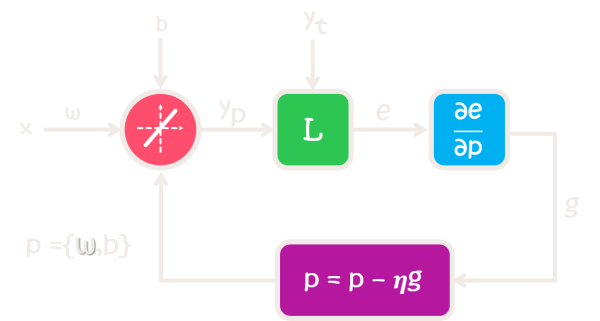

### Imports

In [ ]:
import torch
import torch.nn.functional as F
from torch import optim

### Input & target

In [ ]:
x = torch.tensor([[1., 2., 0., 4., 1.],
                  [0., 1., 1., 1., 1.],
                  [2., 3., 0., 1., 4.]])

yt = torch.tensor([1., 2., 0.])

### From Section 1

In [ ]:
class Neuron:
  def __init__(self, m, af):
      self.w = torch.randn(m, requires_grad=True)
      self.b = torch.randn(1, requires_grad=True)
      self.af = af

  def __call__(self, x):
    if self.af == 'linear':
      y = self.linear(self.w @ x + self.b)
    elif self.af == 'step':
      y = self.step(self.w @ x + self.b)
    return y

  def linear(self, x):
    return x

  def step(self, x):
    pass

In [ ]:
neuron = Neuron(5, 'linear')

In [ ]:
yp = neuron(x[0])

### From Section 2

In [ ]:
e = F.mse_loss(yp, yt[[0]])
e

tensor(7.8715, grad_fn=<MseLossBackward0>)

### From Section 4

In [ ]:
e.backward()

In [ ]:
neuron.w.grad, neuron.b.grad

(tensor([ 5.6113, 11.2225,  0.0000, 22.4450,  5.6113]), tensor([5.6113]))

### Now add optimizer!

### Final

# **Section 6: Create the First Neural Network 🧠**

## Example 1: single neuron 

In [ ]:
x = torch.randn(1)

## Example 2: fully connected layer (perceptron layer)

In [ ]:
x = torch.tensor([[94., 69, 33, 42],
                  [66, 72, 21, 99],
                  [98, 59, 54, 38],
                  [60, 86, 37, 21],
                  [29, 65, 41, 78],
                  [56,  5, 99, 11]])  #shape[6,4]

## Example 3: MLP

In [ ]:
x = torch.tensor([[  6.,   9,   5],
                  [ -1,  -10,   5],
                  [  2,   -1,  -9],
                  [  3,    1,   1]]) #[n_sample=4, n_feature=3]

# **Final Section: Train Neural Network 🚅**

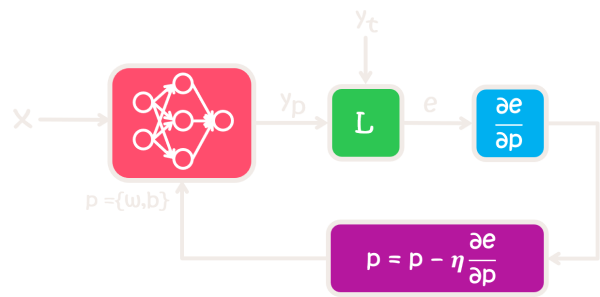

## Imports

In [ ]:
import torch
from torch import nn
from torch import optim

import pandas as pd
import matplotlib.pyplot as plt

## Step 1: load data

In [ ]:
!cp /content/drive/MyDrive/deep-learning-howsam/chapter-1-mlp/data/train.csv train.csv

!cp /content/drive/MyDrive/deep-learning-howsam/chapter-1-mlp/data/test.csv test.csv

### Train

### Test

In [ ]:
df = pd.read_csv('test.csv')
df.head()

In [ ]:
x_test = torch.FloatTensor(df['x'].values).unsqueeze(1)
y_test = torch.FloatTensor(df['y'].values)

In [ ]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)

## Step 2: build the NN model

## Step 3: define loss function

## Step 4: define optimization

In [ ]:
# w = ...
# b = ...
# params = [w,b]

optimizer = optim.SGD(params(), lr=0.1)

## Step 5: train looooop! 🍭

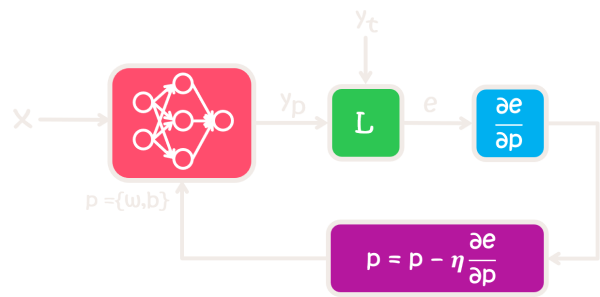

## Visualizzzzzze 📈

## Step 6: test